In [1]:
import pandas as pd
import numpy as np
import setup_jwlab


from jwlab.constants import cleaned_data_filepath
from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from jwlab.ml_prep_perm import prep_ml, slide_df, init, load_ml_data, get_bad_trials, map_participants,average_trials_and_participants
from jwlab.bad_trials import get_bad_trials, get_left_trial_each_word


from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


rohan
user rohan
Z:\Jenn\Datatracker\ML_badtrials-Table 1.csv
Hello


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_fold iterations, number of sample iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

Cluster analysis procedure


C:\Users\Rohan\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Rohan\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


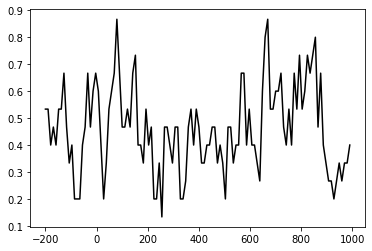

In [3]:
result = cluster_analysis_procedure(9, False, "average_trials_and_participants", [-200, 1000, [50], 10], [1, 2, 1])

In [25]:
import statistics
negsum = 0
negsum += stats.ttest_1samp(result[0][15], .5).statistic
negsum += stats.ttest_1samp(result[0][16], .5).statistic
negsum += stats.ttest_1samp(result[0][17], .5).statistic
negsum += stats.ttest_1samp(result[0][18], .5).statistic
negsum += stats.ttest_1samp(result[0][19], .5).statistic

In [26]:
negsum

-87.39154049028781

In [6]:
results = cluster_analysis_procedure(9, False, "average_trials_and_participants", [-200, 1000, [100], 10], [1, 1, 20])


KeyboardInterrupt: 

In [ ]:
num_win= 120

pvalues_pos = []
pvalues_neg = []
tvalues_pos = []
tvalues_neg = []
for i in range(len(results)):
    for j in range(num_win):
        # change the second argument below for comparison
        istat = stats.ttest_1samp(results[i][j], .5)
        pvalues_pos += [istat.pvalue] if istat.statistic > 0 else [1]
        pvalues_neg += [istat.pvalue] if istat.statistic < 0 else [1]
        # removed just so that we can get the negative value from the pre window
        tvalues_pos += [istat.statistic] if istat.statistic > 0 else [0]
        tvalues_neg += [istat.statistic] if istat.statistic < 0 else [0]

In [2]:
# For null distribution
# MAKE SURE YOU TURN OFF PRINT FUNCTION

itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 15, 20])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

549.4334729161642
0


KeyboardInterrupt: 

In [ ]:


plt.hist(arrTmass, bins = 20)
plt.show()